In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load your dataset
df = pd.read_csv('/content/all_bikez_curated (1) (1).csv')
df.head()


<ipython-input-6-f5c0c0691f68>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/all_bikez_curated (1) (1).csv')


,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN


In [37]:
df.info()
#noticed that year data type is object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9618 entries, 61 to 38375
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                9618 non-null   object 
 1   Model                9618 non-null   object 
 2   Year                 9618 non-null   float64
 3   Category             9618 non-null   object 
 4   Displacement (ccm)   9618 non-null   float64
 5   Power (hp)           9618 non-null   float64
 6   Engine cylinder      9618 non-null   object 
 7   Engine stroke        9618 non-null   object 
 8   Gearbox              9618 non-null   object 
 9   Fuel capacity (lts)  9618 non-null   float64
 10  Fuel system          9618 non-null   object 
 11  Fuel control         9618 non-null   object 
 12  Cooling system       9618 non-null   object 
 13  Transmission type    9618 non-null   object 
 14  Dry weight (kg)      9618 non-null   float64
 15  Wheelbase (mm)       9618 non-null  

In [8]:
#could't convert the column due to strings
df["Year"].unique()
df["Year"] = df["Year"].astype(str).str.replace(" CE", "")

In [9]:
df["Year"]=df["Year"].astype("float64")

In [38]:
df.isna().sum()

Brand                  0
Model                  0
Year                   0
Category               0
Displacement (ccm)     0
Power (hp)             0
Engine cylinder        0
Engine stroke          0
Gearbox                0
Fuel capacity (lts)    0
Fuel system            0
Fuel control           0
Cooling system         0
Transmission type      0
Dry weight (kg)        0
Wheelbase (mm)         0
Seat height (mm)       0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
null_model_rows = df[df['Model'].isnull()]
null_model_rows
#when exploring the rows that has the model column null it shows that such information is important and the row doesn't have a great value when the model is absent

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
5831,coventry eagle,NaN,1922.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5832,coventry eagle,NaN,1923.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5833,coventry eagle,NaN,1924.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5834,coventry eagle,NaN,1925.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5835,coventry eagle,NaN,1926.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5836,coventry eagle,NaN,1927.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5837,coventry eagle,NaN,1928.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
5838,coventry eagle,NaN,1929.0,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN
6063,cz,NaN,1994.0,Unspecified category,180.0,13.0,Single cylinder,two-stroke,4-speed,12.50,NaN,NaN,NaN,NaN,128.0,NaN,780.0
6697,derringer,NaN,2010.0,Classic,49.0,NaN,Single cylinder,four-stroke,Automatic,6.81,Carburettor,NaN,NaN,Chain,NaN,NaN,NaN


In [12]:
df.dropna(subset=['Model'], inplace=True)

In [13]:
df['Engine stroke'].unique()

array(['Electric', ' four-stroke', ' two-stroke', nan, 'Diesel',
       'Square four cylinder', 'Single disk Wankel', 'Radial',
       'Gas turbine', 'Dual disk Wankel'], dtype=object)

In [14]:
#since the engine types can be the same in the case of same model so it can be the most convenient way to fill its null values
df['Engine stroke'] = df.groupby('Model')['Engine stroke'].fillna(method='ffill')

In [33]:
#it shows that there is still 4 null values
null_engine_stroke = df[df['Engine stroke'].isnull()]
null_engine_stroke

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)


In [16]:
#since the 4 rows shown above are mostly null and are rare models with no other details so they don't add alot to the dataset
df.dropna(subset=['Engine stroke'], inplace=True)

In [ ]:
#filling the rest null values will be by same way as i find it better than just using mode or mean because we are talking about specific models and brands
#next step is to find what the column we are trying to fill is dependent on

In [17]:
df['Power (hp)'] = df.groupby('Engine stroke')['Power (hp)'].fillna(method='ffill')

In [34]:
null_power = df[df['Power (hp)'].isnull()]
null_power

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
1579,arctic cat,super duty diesel,2010.0,ATV,695.0,NaN,Diesel,Diesel,Automatic,22.00,NaN,Single Overhead Cams (SOHC),Liquid,Belt,382.0,1473.0,NaN
1580,arctic cat,super duty diesel,2011.0,ATV,695.0,NaN,Diesel,Diesel,Automatic,20.10,NaN,Single Overhead Cams (SOHC),Liquid,Belt,382.0,1473.0,NaN
1681,ariel,4f square four 500,1931.0,Allround,498.0,NaN,Square four cylinder,Square four cylinder,4-speed,13.25,Carburettor. Amal,Overhead Cams (OHC),Air,Chain,193.0,1385.0,NaN
17049,jrl,radial flyer 2800,2008.0,Custom / cruiser,2800.0,NaN,Radial,Radial,6-speed,NaN,Carburettor. S and S,Overhead Valves (OHV),NaN,NaN,NaN,NaN,NaN


In [19]:
df['Gearbox'] = df.groupby('Engine stroke')['Gearbox'].fillna(method='ffill')

In [20]:
df['Engine cylinder'] = df.groupby('Engine stroke')['Engine cylinder'].fillna(method='ffill')

In [21]:
df['Displacement (ccm)'] = df.groupby('Engine stroke')['Displacement (ccm)'].fillna(method='ffill')

In [22]:
df['Fuel capacity (lts)'] = df.groupby('Model')['Fuel capacity (lts)'].fillna(method='ffill')

In [23]:
df['Fuel system'] = df.groupby('Model')['Fuel system'].fillna(method='ffill')

In [24]:
df['Fuel control'] = df.groupby('Model')['Fuel control'].fillna(method='ffill')

In [25]:
df['Cooling system'] = df.groupby('Model')['Cooling system'].fillna(method='ffill')

In [26]:
df['Transmission type'] = df.groupby('Model')['Transmission type'].fillna(method='ffill')

In [27]:
df['Dry weight (kg)'] = df.groupby('Model')['Dry weight (kg)'].fillna(method='ffill')

In [28]:
df['Wheelbase (mm)'] = df.groupby('Model')['Wheelbase (mm)'].fillna(method='ffill')

In [29]:
df['Seat height (mm)'] = df.groupby('Model')['Seat height (mm)'].fillna(method='ffill')

In [ ]:
#since there is still null values we will need another approach to deal with them

In [31]:
#since rows with that much given information won't be useful
df.dropna(subset=['Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system'], how='all', inplace=True)

In [36]:
#will be dropping anyother null values as filling them with non-accurate information won't help the dataset and can lead to wrong statistics later
df.dropna(inplace=True)

In [39]:
df.describe()

,Year,Displacement (ccm),Power (hp),Fuel capacity (lts),Dry weight (kg),Wheelbase (mm),Seat height (mm)
count,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000
mean,2011.707008,715.001705,65.937211,14.275553,188.481129,1461.335829,796.091391
std,14.010143,581.927256,53.814478,5.575939,80.839619,147.902581,127.346865
min,1912.000000,40.000000,0.300000,1.800000,18.000000,889.000000,87.000000
25%,2008.000000,249.000000,18.300000,9.500000,123.000000,1380.000000,749.000000
50%,2013.000000,645.500000,53.600000,15.000000,177.000000,1460.000000,800.000000
75%,2017.000000,1050.000000,97.000000,18.000000,226.000000,1530.000000,830.000000
max,3019.000000,6200.000000,445.000000,33.000000,1000.000000,3327.000000,7501.000000


(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Year'),
  Text(2, 0, 'Displacement (ccm)'),
  Text(3, 0, 'Power (hp)'),
  Text(4, 0, 'Fuel capacity (lts)'),
  Text(5, 0, 'Dry weight (kg)'),
  Text(6, 0, 'Wheelbase (mm)'),
  Text(7, 0, 'Seat height (mm)')])

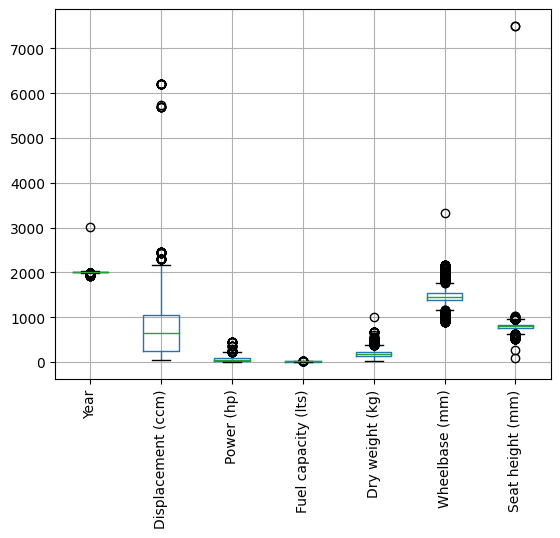

In [45]:
df.boxplot()
plt.xticks(rotation=90)
#it here shows that this datset has outliers